In [2]:
import numpy as np
import pandas as pd
import numpy as np

In [62]:
pima_dataset = pd.read_csv('diabetes.csv')


In [4]:
pima_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold


In [7]:
models = ["LinearRegression", "LogisticRegression"]

In [8]:
X = pima_dataset.drop(columns='Outcome').values

In [9]:
y = pima_dataset['Outcome'].values

In [10]:
def get_cv_results(model_type, X, y, cv_number):
    model = model_type
    cv_results = cross_val_score(model, X, y, cv = cv_number)
    print(cv_results)
    print("Average {}-Fold CV score: {}".format(cv_number, np.mean(cv_results)))
    return(cv_results)

In [11]:
cv_results = get_cv_results(LinearRegression(), X, y, 5)

[0.25683342 0.2575739  0.29068798 0.28108337 0.29414534]
Average 5-Fold CV score: 0.2760648005259741


In [14]:
def standard_predictor(model_type,X, y, test_size_value= 0.3, random_state_value= 42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_value, random_state = random_state_value )
    model = model_type(max_iter=1200000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Model score: {}".format(model.score(X_test, y_test)))
    cv_results = get_cv_results(model, X, y, 5 )# tutaj wybór liczby cross validation
    y_pred_prob = print_ROC_curve(model, X_test, y_test)
    print("ROC AUC score: {}".format(roc_auc_score(y_test, y_pred_prob)))
    AUC_using_cross_validation(model, 5)

Model score: 0.7359307359307359
[0.77272727 0.74675325 0.75324675 0.81045752 0.77777778]
Average 5-Fold CV score: 0.7721925133689839


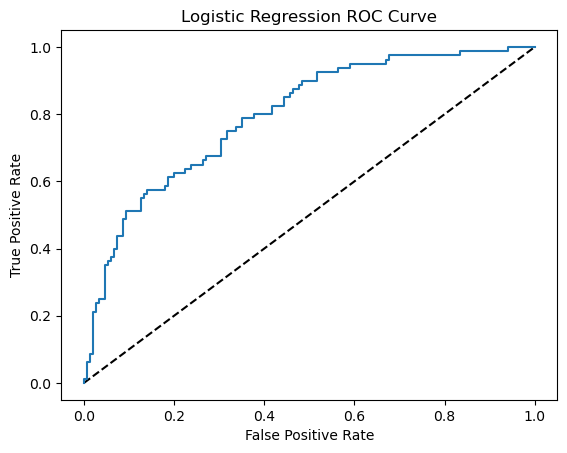

ROC AUC score: 0.796523178807947
AUC CV scores: [0.81240741 0.80777778 0.82555556 0.87283019 0.84490566]
Average 5-Fold AUC CV score: 0.8326953179594689


In [19]:
standard_predictor(LogisticRegression, X, y, )

In [16]:
def print_ROC_curve(model, X_test, y_test):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, tresholds = roc_curve(y_test, y_pred_prob)
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr, label = 'Logistic Regression')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Logistic Regression ROC Curve')
    plt.show();
    return(y_pred_prob)

In [17]:
def AUC_using_cross_validation(model, cv_number):
    auc_cv_scores = cross_val_score(model, X, y, cv=cv_number, scoring = 'roc_auc')
    print("AUC CV scores: {}".format(auc_cv_scores))
    print("Average {}-Fold AUC CV score: {}".format(cv_number, np.mean(auc_cv_scores)))


In [18]:
def grid_search_cv_model(param_grid_dictionary, model_type, cv_number ):
    param_grid =  param_grid_dictionary
    grid_model = model_type(max_iter=1200000)
    grid_model_cv = GridSearchCV(grid_model, param_grid, cv = cv_number) 
    grid_model_cv.fit(X, y)
    print(grid_model_cv.best_params_)
    print(grid_model_cv.best_score_)

In [ ]:
c_space = np.logspace(-5, 8, 15) 
param_grid = {}
param_grid = {"C":c_space, "penalty":['l1', 'l2']}


In [21]:
c_space = np.logspace(-5, 8, 15) 
param_grid = {}
param_grid = {"C":c_space, "penalty":['l2']}

In [22]:
def standard_predictor_grid_search(model_type,X, y, test_size_value= 0.3, random_state_value= 42, param_grid=0, cv_number=0):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_value, random_state = random_state_value )
    model = model_type(max_iter=1200000)
    model_cv = GridSearchCV(model, param_grid, cv = cv_number) 
    
    model_cv.fit(X_train, y_train)
    print("Tuned Logistic Regression Parameter (best_params_): {}".format(model_cv.best_params_))
    print("Tuned Logistic Regression Accuracy (best_score): {}".format(model_cv.best_score_))
    
    y_pred = model_cv.predict(X_test)
    print("Model score: {}".format(model_cv.score(X_test, y_test)))
    
    cv_results = get_cv_results(model_cv, X, y, 5 )# tutaj wybór liczby cross validation
    y_pred_prob = print_ROC_curve(model_cv, X_test, y_test)
    print("ROC AUC score: {}".format(roc_auc_score(y_test, y_pred_prob)))
    AUC_using_cross_validation(model_cv, 5)
    

Tuned Logistic Regression Parameter (best_params_): {'C': 0.006105402296585327, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy (best_score): 0.7802007615091726
Model score: 0.7272727272727273
[0.75324675 0.74675325 0.75974026 0.79084967 0.77124183]
Average 5-Fold CV score: 0.7643663526016466


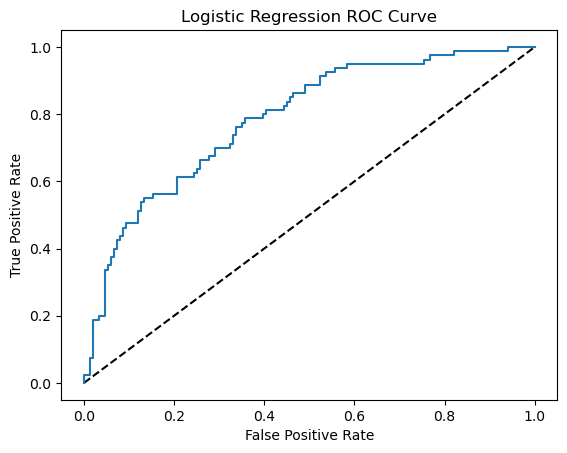

ROC AUC score: 0.7858443708609271
AUC CV scores: [0.8137037  0.8062963  0.82833333 0.85471698 0.84358491]
Average 5-Fold AUC CV score: 0.8293270440251572


In [23]:
standard_predictor_grid_search(LogisticRegression, X, y, 0.3, 42, param_grid, 5 )

In [ ]:
param_dist = {"max_depth": [3, None],
                "max_features": randint(1,9),
                "min_samples_leaf": randint(1,9),
                "criterion": ["gini", "entropy"]}

In [25]:
def standard_predictor_randomized_searchcv(model_type,X, y, test_size_value= 0.3, random_state_value= 42, param_dist=0, cv_number=0):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_value, random_state = random_state_value )
    model = model_type()
    model_cv = RandomizedSearchCV(model, param_dist, cv = cv_number) 
    
    model_cv.fit(X_train, y_train)
    print("Tuned model Parameter (best_params_): {}".format(model_cv.best_params_))
    print("Best score (best_score_): {}".format(model_cv.best_score_))
    
    y_pred = model_cv.predict(X_test)
    print("Model score: {}".format(model_cv.score(X_test, y_test)))
    
    cv_results = get_cv_results(model_cv, X, y, 5 )# tutaj wybór liczby cross validation
    y_pred_prob = print_ROC_curve(model_cv, X_test, y_test)
    print("ROC AUC score: {}".format(roc_auc_score(y_test, y_pred_prob)))
    AUC_using_cross_validation(model_cv, 5)

Tuned model Parameter (best_params_): {'criterion': 'entropy', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 1}
Best score (best_score_): 0.746798200069228
Model score: 0.7186147186147186
[0.73376623 0.70779221 0.71428571 0.67973856 0.75163399]
Average 5-Fold CV score: 0.7174433409727528


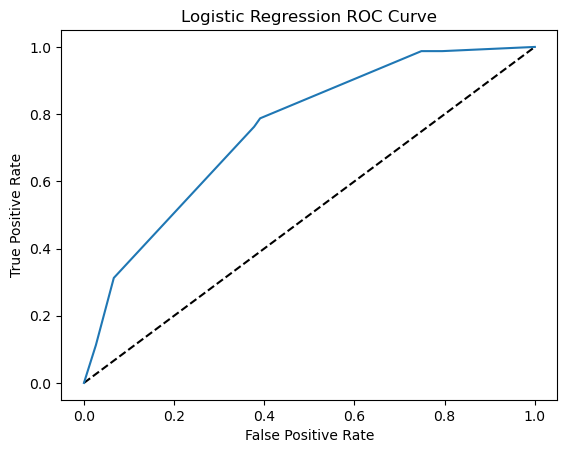

ROC AUC score: 0.7546771523178807
AUC CV scores: [0.79592593 0.6825     0.78953704 0.835      0.78113208]
Average 5-Fold AUC CV score: 0.7768190076869322


In [29]:
standard_predictor_randomized_searchcv(DecisionTreeClassifier, X, y, 0.3, 42, param_dist, 5 )

In [30]:
#Handling missing data
pima_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [24]:
pima_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
#Dropping missing data
pima_dataset.Insulin.replace(0, np.nan, inplace=True)
pima_dataset.BMI.replace(0, np.nan, inplace=True)
pima_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


In [26]:
pima_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,NaN,33.6,0.627,50,1
1,1,85,66,29,NaN,26.6,0.351,31,0
2,8,183,64,0,NaN,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [31]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X)
X = imp.transform(X)

In [32]:
imp.fit(pima_dataset)
pima_dataset = imp.transform(pima_dataset)

In [33]:
pima_dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [34]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [35]:
def standard_predictor_pipeline_imp(model_type,X, y, test_size_value= 0.3, random_state_value= 42):
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')#moze tez byc median i most_frequent
    model = model_type(max_iter=1200000)
    steps = [('imputation', imp), ('logistic_regression', model)]
    pipeline = Pipeline(steps)   
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_value, random_state = random_state_value )
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print("Model score: {}".format(pipeline.score(X_test, y_test)))
    cv_results = get_cv_results(pipeline, X, y, 5 )# tutaj wybór liczby cross validation
    y_pred_prob = print_ROC_curve(pipeline, X_test, y_test)
    print("ROC AUC score: {}".format(roc_auc_score(y_test, y_pred_prob)))
    AUC_using_cross_validation(pipeline, 5)

Model score: 0.7359307359307359
[0.77272727 0.74675325 0.75324675 0.81045752 0.77777778]
Average 5-Fold CV score: 0.7721925133689839


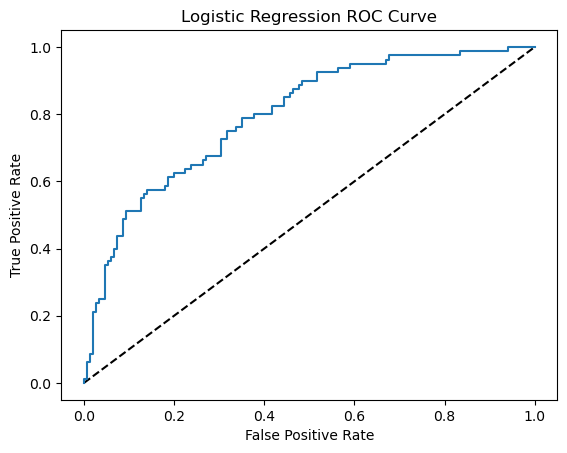

ROC AUC score: 0.796523178807947
AUC CV scores: [0.81240741 0.80777778 0.82555556 0.87283019 0.84490566]
Average 5-Fold AUC CV score: 0.8326953179594689


In [36]:
standard_predictor_pipeline_imp(LogisticRegression, X, y, )

In [ ]:
def standard_predictor_pipeline_SVM(model_type,X, y, test_size_value= 0.3, random_state_value= 42):
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')#moze byc mean, median i most_frequent
    
    model = model_type()
    steps = [('imputation', imp),  ('SVM', model)]
    pipeline = Pipeline(steps)   
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_value, random_state = random_state_value )
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    print("Model score: {}".format(pipeline.score(X_test, y_test)))
    cv_results = get_cv_results(pipeline, X, y, 5 )# tutaj wybór liczby cross validation


In [38]:
standard_predictor_pipeline_SVM(SVC, X, y, )

Model score: 0.7359307359307359
[0.74675325 0.73376623 0.77272727 0.79084967 0.75163399]
Average 5-Fold CV score: 0.7591460826754943


In [39]:
#Scaling in scikit-learn
X_scaled = scale(X)
np.mean(X), np.std(X)

(44.98579117838542, 58.37297131925462)

In [40]:
np.mean(X_scaled), np.std(X_scaled)

(8.86154575644819e-17, 1.0)

In [41]:
def standard_predictor_pipeline_imp_scaler(model_type,X, y, test_size_value= 0.3, random_state_value= 42):
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')#moze tez byc median i most_frequent
    model = model_type(max_iter=1200000)
    steps = [('imputation', imp), ('scaler', StandardScaler()), ('logistic_regression', model)]
    pipeline = Pipeline(steps)   
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_value, random_state = random_state_value )
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print("Model score: {}".format(pipeline.score(X_test, y_test)))
    cv_results = get_cv_results(pipeline, X, y, 5 )# tutaj wybór liczby cross validation
    y_pred_prob = print_ROC_curve(pipeline, X_test, y_test)
    print("ROC AUC score: {}".format(roc_auc_score(y_test, y_pred_prob)))
    AUC_using_cross_validation(pipeline, 5)

Model score: 0.7359307359307359
[0.77272727 0.74675325 0.75324675 0.81699346 0.76470588]
Average 5-Fold CV score: 0.7708853238265002


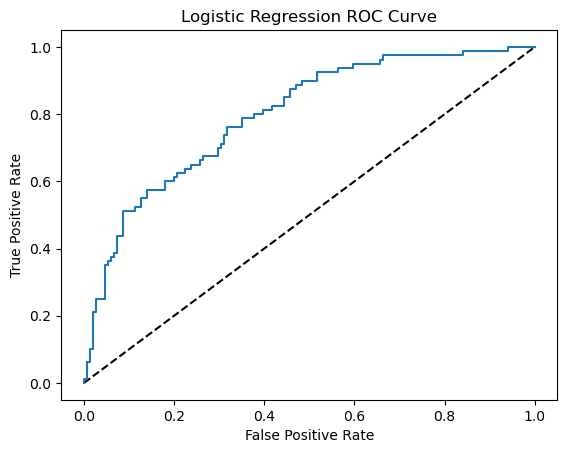

ROC AUC score: 0.7978476821192053
AUC CV scores: [0.81240741 0.80925926 0.82537037 0.87339623 0.84396226]
Average 5-Fold AUC CV score: 0.832879105520615


In [42]:
standard_predictor_pipeline_imp_scaler(LogisticRegression, X, y, )

In [43]:
def standard_predictor_grid_search_imp_scaler(model_type,X, y, test_size_value= 0.3, random_state_value= 42, param_grid=0, cv_number=0):
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')#moze tez byc median i most_frequent
    model = model_type(max_iter=1200000)
    steps = [('imputation', imp), ('scaler', StandardScaler()), ('logistic_regression', model)]
    pipeline = Pipeline(steps)   
    print(pipeline.get_params().keys())


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_value, random_state = random_state_value )
   
    model_cv = GridSearchCV(pipeline, param_grid, cv = cv_number) 
    model_cv.fit(X_train, y_train)
    print("Tuned Logistic Regression Parameter (best_params_): {}".format(model_cv.best_params_))
    print("Tuned Logistic Regression Accuracy (best_score): {}".format(model_cv.best_score_))
    
    y_pred = model_cv.predict(X_test)
    print("Model score: {}".format(model_cv.score(X_test, y_test)))
    
    cv_results = get_cv_results(model_cv, X, y, 5 )# tutaj wybór liczby cross validation
    y_pred_prob = print_ROC_curve(model_cv, X_test, y_test)
    print("ROC AUC score: {}".format(roc_auc_score(y_test, y_pred_prob)))
    AUC_using_cross_validation(model_cv, 5)
    
    
  
    

dict_keys(['memory', 'steps', 'verbose', 'imputation', 'scaler', 'logistic_regression', 'imputation__add_indicator', 'imputation__copy', 'imputation__fill_value', 'imputation__missing_values', 'imputation__strategy', 'imputation__verbose', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'logistic_regression__C', 'logistic_regression__class_weight', 'logistic_regression__dual', 'logistic_regression__fit_intercept', 'logistic_regression__intercept_scaling', 'logistic_regression__l1_ratio', 'logistic_regression__max_iter', 'logistic_regression__multi_class', 'logistic_regression__n_jobs', 'logistic_regression__penalty', 'logistic_regression__random_state', 'logistic_regression__solver', 'logistic_regression__tol', 'logistic_regression__verbose', 'logistic_regression__warm_start'])
Tuned Logistic Regression Parameter (best_params_): {'logistic_regression__C': 0.4393970560760795, 'logistic_regression__penalty': 'l2'}
Tuned Logistic Regression Accuracy (best_score): 0.77644513672551

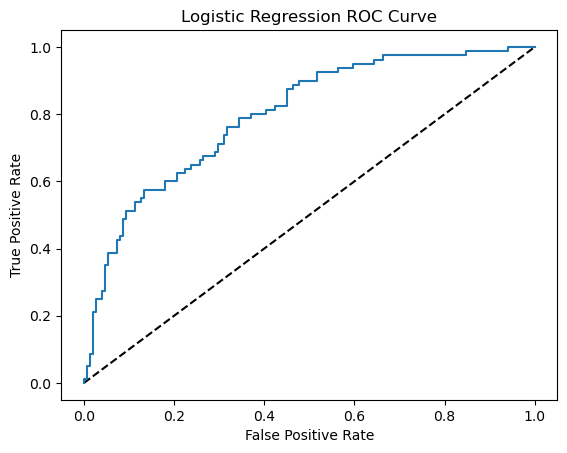

ROC AUC score: 0.7985927152317881
AUC CV scores: [0.81222222 0.80907407 0.82518519 0.87301887 0.84471698]
Average 5-Fold AUC CV score: 0.8328434661076172


In [44]:
c_space = np.logspace(-5, 8, 15) 
param_grid = {}
param_grid = {"logistic_regression__C":c_space, "logistic_regression__penalty":['l2']}
standard_predictor_grid_search_imp_scaler(LogisticRegression, X, y, 0.3, 42, param_grid, 5 )

In [ ]:
from tkinter import Grid


def standard_predictor_pipeline_SVM_gridsearch(model_type,X, y, test_size_value= 0.3, random_state_value= 42):
    
    model = model_type()
    steps =  [('scaler', StandardScaler()),  ('SVM', model)]
    pipeline = Pipeline(steps)   
    
    parameters = {'SVM__C':[1,10,100], 'SVM__gamma':[0.1, 0.01]}

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_value, random_state = random_state_value )
    print(pipeline.get_params().keys())
    cv = GridSearchCV(pipeline, param_grid = parameters)
    cv.fit(X_train, y_train)
    y_pred = cv.predict(X_test)
    

    print("Accuracy: {}".format(cv.score(X_test, y_test)))
    print("Tuned Model Parameters: {}".format(cv.best_params_))
    print("Model score: {}".format(cv.score(X_test, y_test)))
    cv_results = get_cv_results(pipeline, X, y, 5 )

In [46]:
standard_predictor_pipeline_SVM_gridsearch(SVC, X, y, )

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'SVM', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'SVM__C', 'SVM__break_ties', 'SVM__cache_size', 'SVM__class_weight', 'SVM__coef0', 'SVM__decision_function_shape', 'SVM__degree', 'SVM__gamma', 'SVM__kernel', 'SVM__max_iter', 'SVM__probability', 'SVM__random_state', 'SVM__shrinking', 'SVM__tol', 'SVM__verbose'])
Accuracy: 0.7532467532467533
Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.01}
Model score: 0.7532467532467533
[0.76623377 0.75324675 0.74675325 0.81699346 0.77777778]
Average 5-Fold CV score: 0.7722010016127664


In [ ]:
samples = datasets.load_iris()


In [48]:
model = KMeans(n_clusters=3)
model.fit(samples)
labels = model.predict(samples)
print(labels)

TypeError: float() argument must be a string or a real number, not 'Bunch'

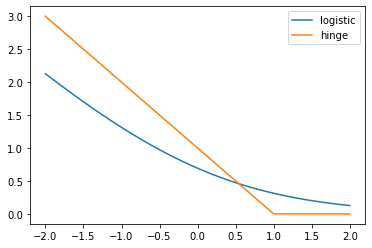

In [ ]:
# Comparing the logstic and hinge losses
def log_loss(raw_model_output):
    return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
    return np.maximum(0, 1-raw_model_output)

#Create a grid of values and plot
grid = np.linspace(-2, 2, 1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()    

In [ ]:

lr_L1 = LogisticRegression(penalty='l1')
lr_L2 = LogisticRegression()

lr_L1.fit(X_train, y_train)
lr_L2.fit(X_train, y_train)


In [49]:
def standard_predictor_pipeline_tree_classifier(model_type,X, y, test_size_value= 0.3, random_state_value= 42):
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')#moze byc mean, median i most_frequent
    
    model = model_type(max_depth=5, random_state = 1, criterion='gini') #lub criterion='entropy'
    steps = [('imputation', imp),  ('tree_classifier', model)]
    pipeline = Pipeline(steps)   
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_value, random_state = random_state_value )
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print("Test set accuracy: {}".format(accuracy_score(y_test, y_pred)))
    print("Model score: {}".format(pipeline.score(X_test, y_test)))
    cv_results = get_cv_results(pipeline, X, y, 5 )# tutaj wybór liczby cross validation
    y_pred_prob = print_ROC_curve(pipeline, X_test, y_test)
    print("ROC AUC score: {}".format(roc_auc_score(y_test, y_pred_prob)))
    AUC_using_cross_validation(pipeline, 5)

Test set accuracy: 0.7532467532467533
Model score: 0.7532467532467533
[0.74675325 0.68831169 0.75324675 0.79084967 0.77777778]
Average 5-Fold CV score: 0.7513878278584161


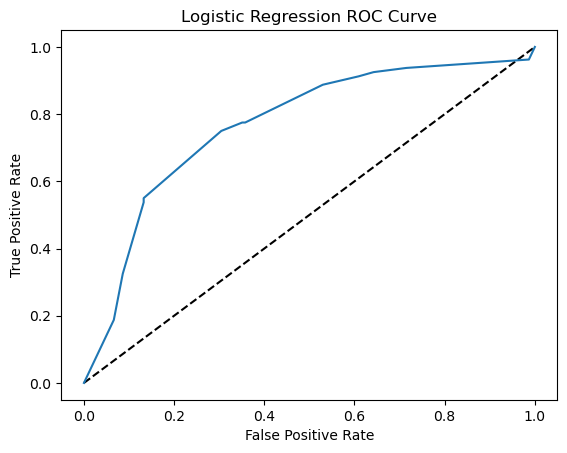

ROC AUC score: 0.7675496688741721
AUC CV scores: [0.81759259 0.72333333 0.80518519 0.83575472 0.82028302]
Average 5-Fold AUC CV score: 0.8004297693920336


In [50]:
standard_predictor_pipeline_tree_classifier(DecisionTreeClassifier, X, y, )

In [ ]:
def standard_predictor_pipeline_voting_classifier(X, y, test_size_value= 0.3, random_state_value= 42):

    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_value, random_state = random_state_value )
    
    model = SVC()
    steps_svm =  [('scaler', StandardScaler()),  ('SVM', model)]
    pipeline_svm = Pipeline(steps_svm)   
    
    parameters_svm = {'SVM__C':[1,10,100], 'SVM__gamma':[0.1, 0.01]}

    cv_svm = GridSearchCV(pipeline_svm, param_grid = parameters_svm)
    
    lr = LogisticRegression(random_state=random_state_value, max_iter=1200000)
    
    dt = DecisionTreeClassifier( max_depth=5, random_state = 1, criterion='gini')
    

    classifiers = [("cv_svm", cv_svm), ("Logistic Regression", lr), ("Classification Tree", dt)]

    for clf_name, clf in classifiers:
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))
    
    vc = VotingClassifier(estimators=classifiers)
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')#moze byc mean, median i most_frequent
    steps = [('imputation', imp),  ('voting_classifier', vc)]
    pipeline = Pipeline(steps)   
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print("Test set accuracy: {}".format(accuracy_score(y_test, y_pred)))
    print("Model score: {}".format(pipeline.score(X_test, y_test)))
    cv_results = get_cv_results(pipeline, X, y, 5 )# tutaj wybór liczby cross validation


In [52]:
standard_predictor_pipeline_voting_classifier( X, y )

cv_svm : 0.753
Logistic Regression : 0.736
Classification Tree : 0.753
Test set accuracy: 0.7575757575757576
Model score: 0.7575757575757576
[0.77922078 0.75324675 0.77272727 0.80392157 0.77124183]
Average 5-Fold CV score: 0.7760716407775231


In [53]:
def standard_predictor_pipeline_tree_bagging_classifier(model_type,X, y, test_size_value= 0.3, random_state_value= 42):
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')#moze byc mean, median i most_frequent
    
    model = model_type(max_depth=5,  random_state = 1, criterion='gini') #lub criterion='entropy', min_samples_leaf = 0.16,
    steps = [('imputation', imp),  ('tree_classifier', model)]
    pipeline = Pipeline(steps)   
    
    bc = BaggingClassifier(base_estimator=pipeline, n_estimators=300, n_jobs=-1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_value, random_state = random_state_value )
    
    bc.fit(X_train, y_train)
    y_pred = bc.predict(X_test)
    print("Test set accuracy: {}".format(accuracy_score(y_test, y_pred)))
    print("Model score: {}".format(bc.score(X_test, y_test)))
    cv_results = get_cv_results(bc, X, y, 5 )# tutaj wybór liczby cross validation
    y_pred_prob = print_ROC_curve(bc, X_test, y_test)
    print("ROC AUC score: {}".format(roc_auc_score(y_test, y_pred_prob)))
    AUC_using_cross_validation(bc, 5)
    return(bc)

Test set accuracy: 0.7532467532467533
Model score: 0.7532467532467533
[0.76623377 0.73376623 0.76623377 0.82352941 0.75816993]
Average 5-Fold CV score: 0.7695866225277991


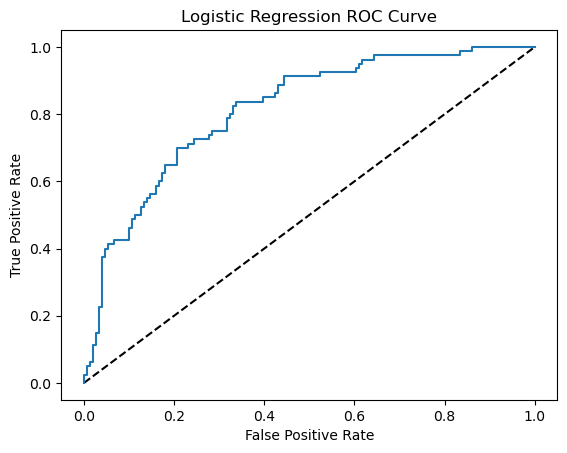

ROC AUC score: 0.8131622516556292
AUC CV scores: [0.8162963  0.78574074 0.83092593 0.89169811 0.83641509]
Average 5-Fold AUC CV score: 0.8322152341020266


In [54]:
bc = standard_predictor_pipeline_tree_bagging_classifier(DecisionTreeClassifier, X, y, )

In [56]:
def standard_predictor_pipeline_tree_bagging_oob_classifier(model_type,X, y, test_size_value= 0.3, random_state_value= 42):
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')#moze byc mean, median i most_frequent
    
    model = model_type(max_depth=5,  random_state = 1, criterion='gini') #lub criterion='entropy', min_samples_leaf = 0.16,
    steps = [('imputation', imp),  ('tree_classifier', model)]
    pipeline = Pipeline(steps)   
    
    bc = BaggingClassifier(base_estimator=pipeline, n_estimators=300, oob_score=True, n_jobs=-1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_value, random_state = random_state_value )
    
    bc.fit(X_train, y_train)
    y_pred = bc.predict(X_test)
    
    print("Test set accuracy: {}".format(accuracy_score(y_test, y_pred)))
    oob_accuracy = bc.oob_score_
    print('OOB accuracy: {:.3f}'.format(oob_accuracy))

    print("Model score: {}".format(bc.score(X_test, y_test)))
    cv_results = get_cv_results(bc, X, y, 5 )# tutaj wybór liczby cross validation
    y_pred_prob = print_ROC_curve(bc, X_test, y_test)
    print("ROC AUC score: {}".format(roc_auc_score(y_test, y_pred_prob)))
    AUC_using_cross_validation(bc, 5)
  

Test set accuracy: 0.7532467532467533
OOB accuracy: 0.754
Model score: 0.7532467532467533
[0.75324675 0.72727273 0.77272727 0.83660131 0.76470588]
Average 5-Fold CV score: 0.7709107885578474


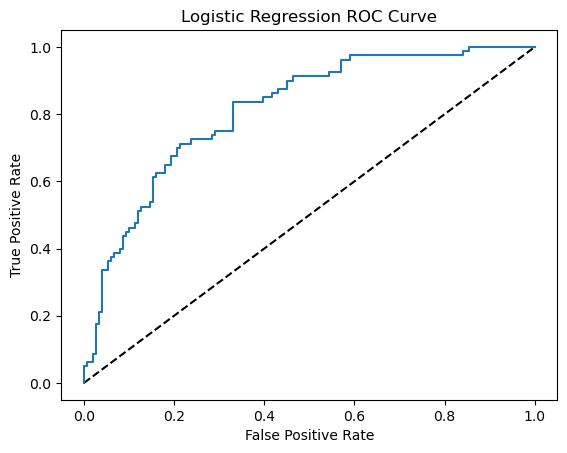

ROC AUC score: 0.8131622516556292
AUC CV scores: [0.81333333 0.78574074 0.83555556 0.89113208 0.83471698]
Average 5-Fold AUC CV score: 0.8320957372466807


In [57]:
standard_predictor_pipeline_tree_bagging_oob_classifier(DecisionTreeClassifier, X, y, )

In [58]:
def standard_predictor_pipeline_randomforests_classifier(X, y, test_size_value= 0.3, random_state_value= 42):
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')#moze byc mean, median i most_frequent
    
    model = RandomForestClassifier(max_depth=20, min_samples_leaf=0.10, random_state = 1, criterion='gini') #lub criterion='entropy'
    steps = [('imputation', imp),  ('tree_classifier', model)]
    pipeline = Pipeline(steps)   
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_value, random_state = random_state_value )
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print("Test set accuracy: {}".format(accuracy_score(y_test, y_pred)))
    print("Model score: {}".format(pipeline.score(X_test, y_test)))
    cv_results = get_cv_results(pipeline, X, y, 5 )# tutaj wybór liczby cross validation
    y_pred_prob = print_ROC_curve(pipeline, X_test, y_test)
    print("ROC AUC score: {}".format(roc_auc_score(y_test, y_pred_prob)))
    AUC_using_cross_validation(pipeline, 5)
    return(model)

Test set accuracy: 0.7359307359307359
Model score: 0.7359307359307359
[0.74675325 0.70779221 0.74025974 0.77124183 0.73856209]
Average 5-Fold CV score: 0.7409218232747644


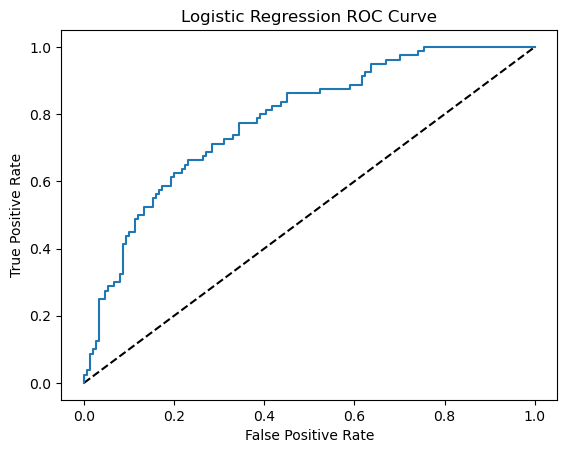

ROC AUC score: 0.7834437086092715
AUC CV scores: [0.79888889 0.78203704 0.82148148 0.88396226 0.8290566 ]
Average 5-Fold AUC CV score: 0.8230852550663872


In [59]:
rf = standard_predictor_pipeline_randomforests_classifier(X, y, )

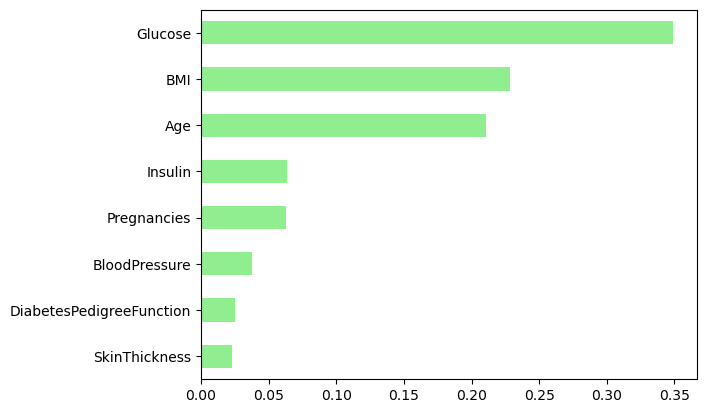

In [63]:
importances_rf = pd.Series(rf.feature_importances_, index = pima_dataset.drop(columns='Outcome').columns)
sorted_importances_rf = importances_rf.sort_values()
sorted_importances_rf.plot(kind='barh', color='lightgreen'); plt.show()

In [64]:
def standard_predictor_pipeline_adaboost_classifier(model_type,X, y, test_size_value= 0.3, random_state_value= 42):
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')#moze byc mean, median i most_frequent
    
    model = model_type(max_depth=5, random_state = 1, criterion='gini') #lub criterion='entropy'

    #instantiate an Adaboost classifier 'adab_clf'
    adb_clf = AdaBoostClassifier(base_estimator=model, n_estimators=100)

    steps = [('imputation', imp),  ('adb_tree_classifier', adb_clf)]
    pipeline = Pipeline(steps)   
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_value, random_state = random_state_value )
    
    pipeline.fit(X_train, y_train)

    print("Print the test set probabilities of positive class (y_pred_proba): {}".format(adb_clf.predict_proba(X_test)[:,1]))
    y_pred = pipeline.predict(X_test)
    print("Test set accuracy: {}".format(accuracy_score(y_test, y_pred)))
    print("Model score: {}".format(pipeline.score(X_test, y_test)))
    cv_results = get_cv_results(pipeline, X, y, 5 )# tutaj wybór liczby cross validation
    y_pred_prob = print_ROC_curve(pipeline, X_test, y_test)
    print("ROC AUC score: {}".format(roc_auc_score(y_test, y_pred_prob)))
    AUC_using_cross_validation(pipeline, 5)

Print the test set probabilities of positive class (y_pred_proba): [4.37814443e-01 7.65868210e-02 8.66564622e-03 4.63870667e-02
 6.03221059e-01 2.66463833e-01 1.09967534e-06 9.93613375e-01
 6.60267196e-01 9.72950118e-01 8.07987835e-04 9.91758314e-01
 1.62111921e-01 3.75492807e-01 6.27857215e-05 8.28136852e-01
 5.84227736e-03 1.57032810e-04 9.97338708e-01 5.46325605e-01
 4.26902142e-01 6.92129601e-03 1.89805371e-03 4.88981143e-04
 9.08910552e-01 9.99307794e-01 5.28197190e-04 3.17110954e-04
 1.14205379e-04 4.63921879e-03 9.07771521e-01 9.88244982e-01
 2.20551235e-01 9.97368754e-01 3.52577439e-01 9.86868412e-01
 9.95493838e-01 2.02600876e-01 8.45853740e-05 9.46917305e-01
 1.20748770e-03 8.96996421e-02 7.69991628e-01 1.45102697e-01
 1.38536516e-05 9.92627227e-01 2.91261715e-01 1.52300315e-02
 3.54876950e-03 9.71707674e-01 4.18852912e-06 9.88365320e-01
 9.94950908e-01 5.30688445e-01 4.24504176e-04 2.02353528e-03
 6.24472190e-01 3.06306738e-06 3.80994766e-01 9.98534962e-01
 5.40656754e-01 1.

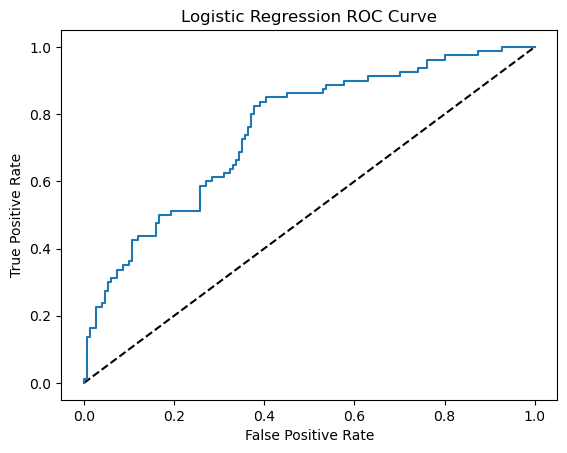

ROC AUC score: 0.7532284768211921
AUC CV scores: [0.78407407 0.77574074 0.80240741 0.83283019 0.78773585]
Average 5-Fold AUC CV score: 0.7965576519916142


In [65]:
standard_predictor_pipeline_adaboost_classifier(DecisionTreeClassifier, X, y, )

In [67]:
def standard_predictor_pipeline_gradient_boosted_classifier(X, y, test_size_value= 0.3, random_state_value= 42):
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')#moze byc mean, median i most_frequent
    
    #model = model_type(max_depth=5, random_state = 1, criterion='gini') #lub criterion='entropy'
    gbt = GradientBoostingClassifier(n_estimators=300, max_depth=5, random_state=1)
    
    steps = [('imputation', imp),  ('gbt_classifier', gbt)]
    pipeline = Pipeline(steps)   
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_value, random_state = random_state_value )
    
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    print("Test set accuracy: {}".format(accuracy_score(y_test, y_pred)))
    print("Model score: {}".format(pipeline.score(X_test, y_test)))
    cv_results = get_cv_results(pipeline, X, y, 5 )# tutaj wybór liczby cross validation
    y_pred_prob = print_ROC_curve(pipeline, X_test, y_test)
    print("ROC AUC score: {}".format(roc_auc_score(y_test, y_pred_prob)))
    AUC_using_cross_validation(pipeline, 5)

Test set accuracy: 0.70995670995671
Model score: 0.70995670995671
[0.77922078 0.73376623 0.76623377 0.82352941 0.76470588]
Average 5-Fold CV score: 0.7734912146676853


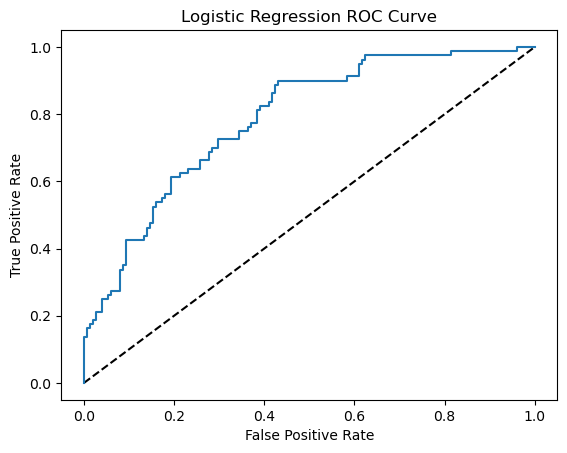

ROC AUC score: 0.7859271523178808
AUC CV scores: [0.8162963  0.78388889 0.81351852 0.88018868 0.7945283 ]
Average 5-Fold AUC CV score: 0.8176841369671559


In [68]:
standard_predictor_pipeline_gradient_boosted_classifier(X, y, )

In [69]:
def standard_predictor_pipeline_stochastic_gbt_classifier(X, y, test_size_value= 0.3, random_state_value= 42):
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')#moze byc mean, median i most_frequent
    
    #model = model_type(max_depth=5, random_state = 1, criterion='gini') #lub criterion='entropy'
    gbt = GradientBoostingClassifier(n_estimators=300, subsample=0.8, max_features=0.2,  max_depth=5, random_state=1)
    
    steps = [('imputation', imp),  ('gbt_classifier', gbt)]
    pipeline = Pipeline(steps)   
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_value, random_state = random_state_value )
    
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    print("Test set accuracy: {}".format(accuracy_score(y_test, y_pred)))
    print("Model score: {}".format(pipeline.score(X_test, y_test)))
    cv_results = get_cv_results(pipeline, X, y, 5 )# tutaj wybór liczby cross validation
    y_pred_prob = print_ROC_curve(pipeline, X_test, y_test)
    print("ROC AUC score: {}".format(roc_auc_score(y_test, y_pred_prob)))
    AUC_using_cross_validation(pipeline, 5)

Test set accuracy: 0.7229437229437229
Model score: 0.7229437229437229
[0.74675325 0.72077922 0.74675325 0.79084967 0.75163399]
Average 5-Fold CV score: 0.7513538748832866


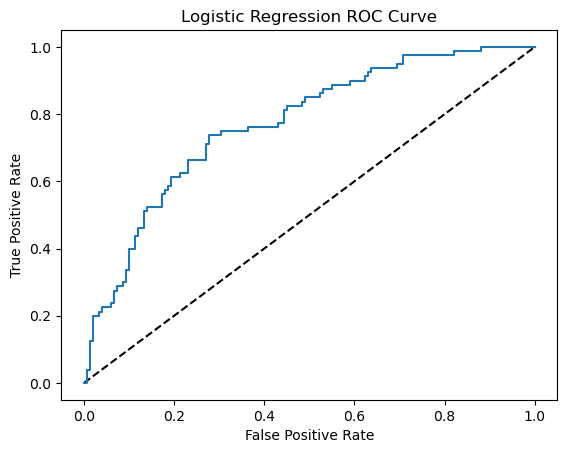

ROC AUC score: 0.7711920529801325
AUC CV scores: [0.78685185 0.77333333 0.81259259 0.88018868 0.81867925]
Average 5-Fold AUC CV score: 0.8143291404612159


In [70]:
standard_predictor_pipeline_stochastic_gbt_classifier(X, y, )

In [71]:
def standard_predictor_pipeline_xgb_classifier(X, y, test_size_value= 0.3, random_state_value= 42):
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')#moze byc mean, median i most_frequent
    
    
    xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)
    
    
    steps = [('imputation', imp),  ('xgb_classifier', xg_cl)]
    pipeline = Pipeline(steps)   
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_value, random_state = random_state_value )
    
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    xg_accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
    print("accuracy: %f" % (xg_accuracy))

    print("Test set accuracy: {}".format(accuracy_score(y_test, y_pred)))
    print("Model score: {}".format(pipeline.score(X_test, y_test)))
    cv_results = get_cv_results(pipeline, X, y, 5 )# tutaj wybór liczby cross validation
    y_pred_prob = print_ROC_curve(pipeline, X_test, y_test)
    print("ROC AUC score: {}".format(roc_auc_score(y_test, y_pred_prob)))
    AUC_using_cross_validation(pipeline, 5)

accuracy: 0.744589
Test set accuracy: 0.7445887445887446
Model score: 0.7445887445887446
[0.74675325 0.72727273 0.74025974 0.80392157 0.75163399]
Average 5-Fold CV score: 0.753968253968254


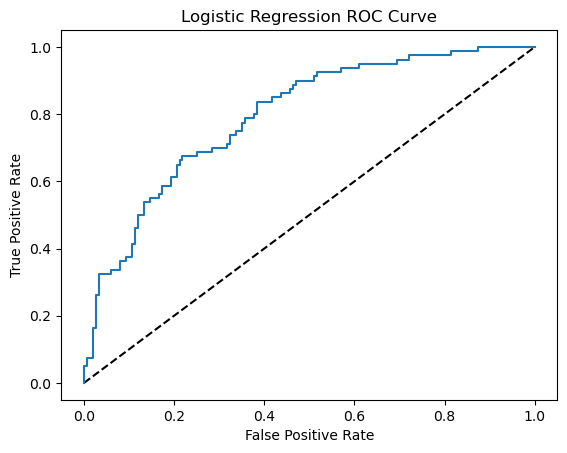

ROC AUC score: 0.7945364238410596
AUC CV scores: [0.80740741 0.75833333 0.79444444 0.86981132 0.81773585]
Average 5-Fold AUC CV score: 0.8095464709993012


In [72]:
standard_predictor_pipeline_xgb_classifier(X, y, )

In [ ]:
def standard_predictor_pipeline_xgb_classifier(X, y, test_size_value= 0.3, random_state_value= 42):
    
    
    xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)
    

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_value, random_state = random_state_value )
    
    xg_cl.fit(X_train, y_train)

    y_pred = xg_cl.predict(X_test)
    xg_accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
    print("accuracy: %f" % (xg_accuracy))

    print("Test set accuracy: {}".format(accuracy_score(y_test, y_pred)))
    print("Model score: {}".format(xg_cl.score(X_test, y_test)))
    cv_results = get_cv_results(xg_cl, X, y, 5 )# tutaj wybór liczby cross validation
    y_pred_prob = print_ROC_curve(xg_cl, X_test, y_test)
    print("ROC AUC score: {}".format(roc_auc_score(y_test, y_pred_prob)))
    AUC_using_cross_validation(xg_cl, 5)

accuracy: 0.744589
Test set accuracy: 0.7445887445887446
Model score: 0.7445887445887446
[0.74675325 0.72727273 0.74025974 0.80392157 0.75163399]
Average 5-Fold CV score: 0.753968253968254


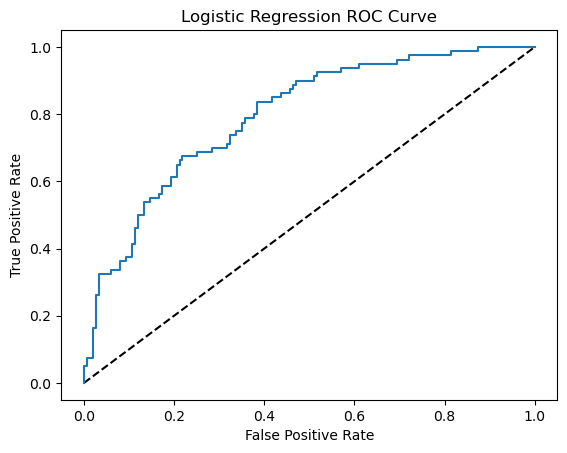

ROC AUC score: 0.7945364238410596
AUC CV scores: [0.80740741 0.75833333 0.79444444 0.86981132 0.81773585]
Average 5-Fold AUC CV score: 0.8095464709993012


In [74]:
standard_predictor_pipeline_xgb_classifier(X, y, )

In [ ]:
def standard_predictor_pipeline_xgb_classifier(X, y, test_size_value= 0.3, random_state_value= 42):
    
    
    xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)
    
    
  
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_value, random_state = random_state_value )
    
    xg_cl.fit(X_train, y_train)

    churn_dmatrix = xgb.DMatrix(data=X, label=y)
    params={"objective":"reg:logistic", "max_depth":3}

    cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, nfold=3, num_boost_round=5, metrics="error", as_pandas=True, seed=123)
    print(cv_results)

    print(((1-cv_results['test-error-mean']).iloc[1]))

    

In [76]:
standard_predictor_pipeline_xgb_classifier(X, y, )

   train-error-mean  train-error-std  test-error-mean  test-error-std
0          0.221354         0.004872         0.252604        0.026557
1          0.195964         0.011314         0.242188        0.016877
2          0.192708         0.007366         0.238281        0.020915
3          0.195964         0.006639         0.239583        0.022402
4          0.184896         0.007191         0.229167        0.024774
0.7578125


In [ ]:
def standard_predictor_pipeline_xgb_classifier_tuned(X, y, test_size_value= 0.3, random_state_value= 42):

    xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=5, learning_rate= 0.1, max_depth= 10,  seed=123)
    
    

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_value, random_state = random_state_value )
    
    xg_cl.fit(X_train, y_train)

    y_pred = xg_cl.predict(X_test)
    xg_accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
    print("accuracy: %f" % (xg_accuracy))

    print("Test set accuracy: {}".format(accuracy_score(y_test, y_pred)))
    print("Model score: {}".format(xg_cl.score(X_test, y_test)))
    cv_results = get_cv_results(xg_cl, X, y, 5 )# tutaj wybór liczby cross validation
    y_pred_prob = print_ROC_curve(xg_cl, X_test, y_test)
    print("ROC AUC score: {}".format(roc_auc_score(y_test, y_pred_prob)))
    AUC_using_cross_validation(xg_cl, 5)

accuracy: 0.748918
Test set accuracy: 0.7489177489177489
Model score: 0.7489177489177489
[0.72077922 0.7012987  0.74025974 0.79738562 0.73202614]
Average 5-Fold CV score: 0.738349885408709


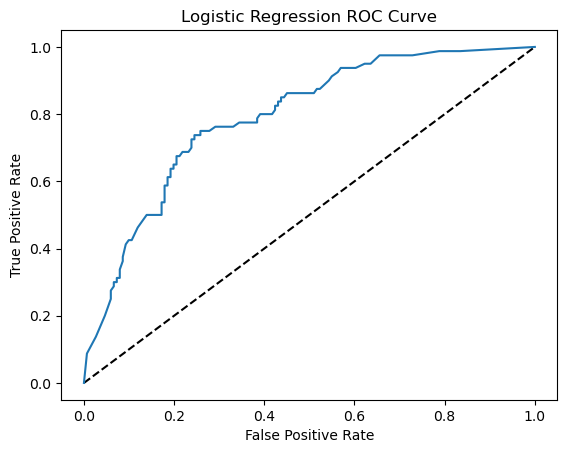

ROC AUC score: 0.7911009933774834
AUC CV scores: [0.77138889 0.72342593 0.76555556 0.85698113 0.79066038]
Average 5-Fold AUC CV score: 0.7816023759608666


In [107]:
standard_predictor_pipeline_xgb_classifier_tuned(X, y, )

In [ ]:
def standard_predictor_pipeline_xgb_gridsearch(X, y, test_size_value= 0.3, random_state_value= 42):
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')#moze byc mean, median i most_frequent
    xg_cl = xgb.XGBClassifier(objective='binary:logistic', seed=123)

    
      
    
    parameters = {'learning_rate':[0.01, 0.1, 0.5, 0.9], 'n_estimators':[200], 'subsample':[0.3, 0.5, 0.9]}

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_value, random_state = random_state_value )
    cv = GridSearchCV(estimator= xg_cl, param_grid = parameters)
    steps =  [('scaler', StandardScaler()), ('imputation', imp),  ('xgb_cv', cv)]
    pipeline = Pipeline(steps) 
   
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    print("Best parameters found: ", cv.best_params_)

    print("Accuracy: {}".format(pipeline.score(X_test, y_test)))
    print("Tuned Model Parameters: {}".format(cv.best_params_))
    print("Model score: {}".format(pipeline.score(X_test, y_test)))
    cv_results = get_cv_results(pipeline, X, y, 5 )

In [149]:
standard_predictor_pipeline_xgb_gridsearch(X, y )#tutaj lepiej ustalisc best_params i z nimi puscic pipeline?

Best parameters found:  {'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 0.3}
Accuracy: 0.7575757575757576
Tuned Model Parameters: {'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 0.3}
Model score: 0.7575757575757576
[0.75324675 0.74675325 0.75974026 0.83006536 0.75816993]
Average 5-Fold CV score: 0.7695951107715814


In [150]:
pima_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [151]:
pima_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [233]:
pima_dataset.shape
non_numeric = ['Outcome']
df_numeric = pima_dataset.drop(non_numeric, axis = 1)
df_numeric.shape

(768, 8)

/Users/szymonturek/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


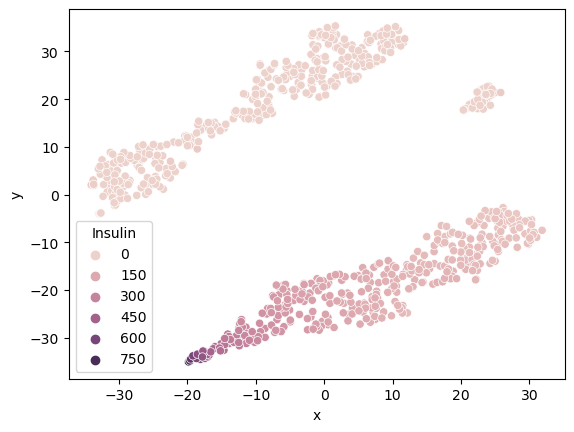

In [ ]:

m = TSNE(learning_rate=50)

tsne_features = m.fit_transform(df_numeric)
tsne_features[1:4, :]

df_numeric['x'] = tsne_features[:,0]
df_numeric['y'] = tsne_features[:,1]

sns.scatterplot(x="x", y="y", hue = "Insulin", data = df_numeric)
plt.show()

In [ ]:


sel = VarianceThreshold(threshold=1)
sel.fit(df_numeric)
mask = sel.get_support() 
print(mask)
reduced_df = df_numeric.loc[:, mask]
print(reduced_df.shape)


[ True  True  True  True  True  True False  True]
(768, 7)


In [179]:
reduced_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,6,148,72,35,0,33.6,50
1,1,85,66,29,0,26.6,31
2,8,183,64,0,0,23.3,32
3,1,89,66,23,94,28.1,21
4,0,137,40,35,168,43.1,33
...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,63
764,2,122,70,27,0,36.8,27
765,5,121,72,23,112,26.2,30
766,1,126,60,0,0,30.1,47


In [ ]:

sel = VarianceThreshold(threshold=0.005)
sel.fit(df_numeric/df_numeric.mean())
reduced_df = df_numeric.loc[:,mask]
print(reduced_df.shape)

(768, 7)


In [ ]:
df_numeric.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [ ]:
df_numeric.isna().sum()/len(df_numeric)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
dtype: float64

In [ ]:

mask = df_numeric.isna().sum()/len(df_numeric) < 0.3
print(mask)
reduced_df = df_numeric.loc[:,mask]
reduced_df.head()

Pregnancies                 True
Glucose                     True
BloodPressure               True
SkinThickness               True
Insulin                     True
BMI                         True
DiabetesPedigreeFunction    True
Age                         True
dtype: bool


In [ ]:
r=-1
r=0
r=1


df_numeric.corr()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


<AxesSubplot: >

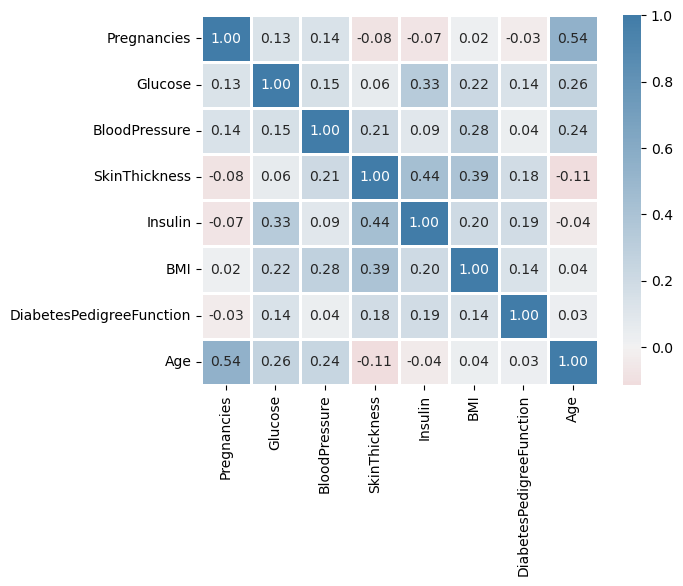

In [ ]:
cmap = sns.diverging_palette(h_neg =10,
                                h_pos=240,
                                as_cmap = True)

sns.heatmap(df_numeric.corr(), center=0, cmap=cmap, linewidths=1, annot=True, fmt=".2f")

<AxesSubplot: >

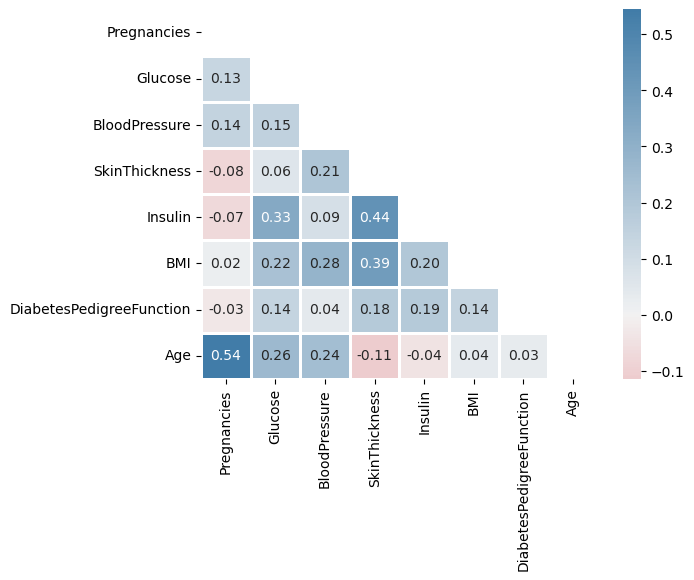

In [190]:
#Visualizing the correlation matrix
corr = df_numeric.corr()
mask = np.triu(np.ones_like(corr))

sns.heatmap(df_numeric.corr(), mask=mask, center=0, cmap=cmap, linewidths=1, annot=True, fmt=".2f")


In [ ]:

corr_df = df_numeric.corr().abs()
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)
tri_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Glucose,0.129459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BloodPressure,0.141282,0.152590,NaN,NaN,NaN,NaN,NaN,NaN
SkinThickness,0.081672,0.057328,0.207371,NaN,NaN,NaN,NaN,NaN
Insulin,0.073535,0.331357,0.088933,0.436783,NaN,NaN,NaN,NaN
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,NaN,NaN,NaN
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,NaN,NaN
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,NaN


In [201]:
#Selecting features for model performance
def standard_predictor_feature_selection(model_type,X, y, test_size_value= 0.3, random_state_value= 42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_value, random_state = random_state_value )
    model = model_type(max_iter=1200000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Model score: {}".format(model.score(X_test, y_test)))
    cv_results = get_cv_results(model, X, y, 5 )# tutaj wybór liczby cross validation
    y_pred_prob = print_ROC_curve(model, X_test, y_test)
    print("ROC AUC score: {}".format(roc_auc_score(y_test, y_pred_prob)))
    AUC_using_cross_validation(model, 5)
    print(model.coef_)
    print(dict(zip(pima_dataset.columns, abs(model.coef_[0]))))
    print(dict(zip(X.columns, abs(model.coef_[0]))))

Model score: 0.7359307359307359
[0.77272727 0.74675325 0.75324675 0.81045752 0.77777778]
Average 5-Fold CV score: 0.7721925133689839


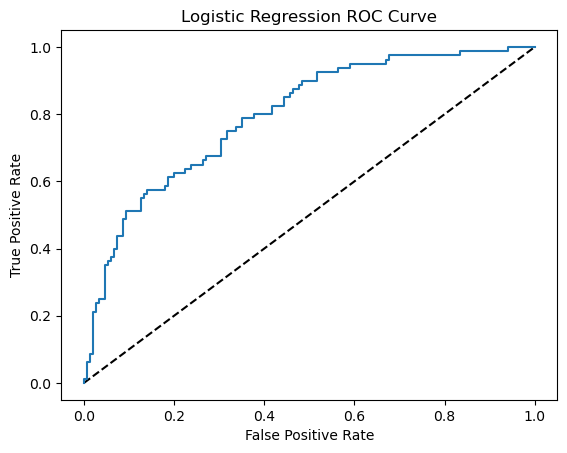

ROC AUC score: 0.796523178807947
AUC CV scores: [0.81240741 0.80777778 0.82555556 0.87283019 0.84490566]
Average 5-Fold AUC CV score: 0.8326953179594689
[[ 0.05778213  0.03590328 -0.01086747 -0.00141213 -0.00098458  0.10909668
   0.37394221  0.03599598]]
{'Pregnancies': 0.057782132354180914, 'Glucose': 0.035903281766658385, 'BloodPressure': 0.01086746840636225, 'SkinThickness': 0.001412133089565005, 'Insulin': 0.0009845780597083863, 'BMI': 0.10909668356806605, 'DiabetesPedigreeFunction': 0.3739422094350265, 'Age': 0.035995977352522565}


In [232]:
standard_predictor_feature_selection(LogisticRegression, X, y, )

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [203]:
#Recursive Feature Elimination
#RFE is a feature selection algorithm that can be wrapped around any model that produces feature coefficients or feature importance values. 
from sklearn.feature_selection import RFE
rfe= RFE(estimator=LogisticRegression(), n_features_to_select=2, verbose=1)

In [211]:
def standard_predictor_RFE(X, y, test_size_value= 0.3, random_state_value= 42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_value, random_state = random_state_value )
    model = RFE(estimator=LogisticRegression(max_iter=1200000), n_features_to_select=2, verbose=1)
    #model = model_type(max_iter=1200000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Model score: {}".format(model.score(X_test, y_test)))
    cv_results = get_cv_results(model, X, y, 5 )# tutaj wybór liczby cross validation
    y_pred_prob = print_ROC_curve(model, X_test, y_test)
    print("ROC AUC score: {}".format(roc_auc_score(y_test, y_pred_prob)))
    AUC_using_cross_validation(model, 5)
    X.columns(model.support_)
    print(dict(zip(X.columns, model.ranking_)))


Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Model score: 0.6796536796536796
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 

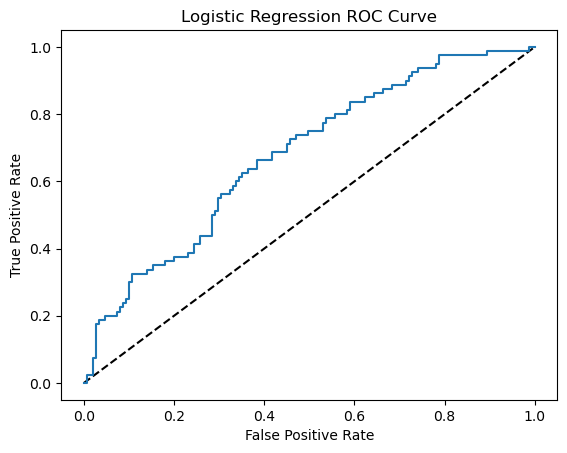

ROC AUC score: 0.6775662251655629
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator wit

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [212]:
standard_predictor_RFE( X, y, )

In [ ]:
#Tree-based feature selection

def standard_predictor_pipeline_randomforests_classifier(X, y, test_size_value= 0.3, random_state_value= 42):
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')#moze byc mean, median i most_frequent
    
    model = RandomForestClassifier(max_depth=20, min_samples_leaf=0.10, random_state = 1, criterion='gini') #lub criterion='entropy'
    steps = [('imputation', imp),  ('tree_classifier', model)]
    pipeline = Pipeline(steps)   
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_value, random_state = random_state_value )
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print("Test set accuracy: {}".format(accuracy_score(y_test, y_pred)))
    print("Model score: {}".format(pipeline.score(X_test, y_test)))
    cv_results = get_cv_results(pipeline, X, y, 5 )# tutaj wybór liczby cross validation
    y_pred_prob = print_ROC_curve(pipeline, X_test, y_test)
    print("ROC AUC score: {}".format(roc_auc_score(y_test, y_pred_prob)))
    AUC_using_cross_validation(pipeline, 5)
    print(model.feature_importances_)#for unimportant features they will be close to zero
    mask = rf.feature_importances_ > 0.1
    print(mask)
    X_reduced = X.loc[:, mask]
    print(X_reduced.columns)
    #return(model)
    model = RFE(estimator=LogisticRegression(max_iter=1200000), n_features_to_select=2, verbose=1)
    model.fit(X_train, y_train)
    

Test set accuracy: 0.7359307359307359
Model score: 0.7359307359307359
[0.74675325 0.70779221 0.74025974 0.77124183 0.73856209]
Average 5-Fold CV score: 0.7409218232747644


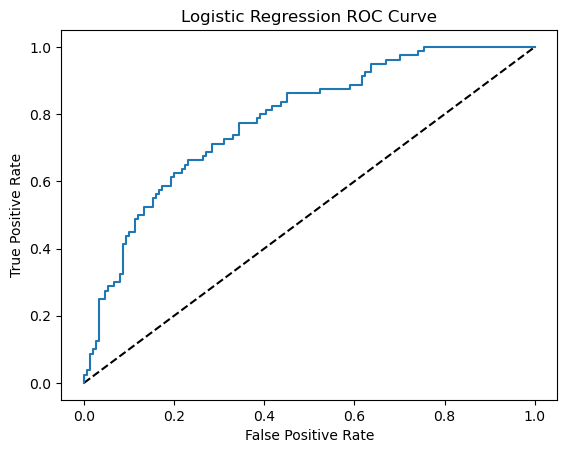

ROC AUC score: 0.7834437086092715
AUC CV scores: [0.79888889 0.78203704 0.82148148 0.88396226 0.8290566 ]
Average 5-Fold AUC CV score: 0.8230852550663872
[0.06267357 0.34929485 0.03764497 0.02298614 0.06329883 0.22822441
 0.02502478 0.21085245]
[False  True False False False  True False  True]


AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [224]:
standard_predictor_pipeline_randomforests_classifier(X, y, )

In [230]:
df_numeric["Age_log_2"] = np.log(df_numeric["Age"])
print(df_numeric)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Insulin_log_2  Age_log_2  
0                       0.627   50       3.91202

In [ ]:
print(np.var(df_numeric[["Insulin", "Insulin_log_2"]]))


Insulin          13263.886875
Insulin_log_2        0.104001
dtype: float64


In [235]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

In [237]:
df_scaled.var()

Pregnancies                 1.001304
Glucose                     1.001304
BloodPressure               1.001304
SkinThickness               1.001304
Insulin                     1.001304
BMI                         1.001304
DiabetesPedigreeFunction    1.001304
Age                         1.001304
dtype: float64

In [ ]:
#Feature engineering


users["sub_enc"] = users["subscribed"].apply(lambda val: 1 if val == "y" else 0)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
users["sub_enc_le"] = le.fit_transform(users["subscribed"])


Example:
- blue: [1,0,0]
- green: [0,1,0]
- orange: [0,0,1]

print(pd.get_dummies(users["fav_color"]))

In [ ]:


from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer()
text_ifdf = tfidf_vec.fit_transform(documents)

In [4]:
n = X.shape[0]
mse = make_scorer(mean_squared_error)
cv_results = cross_val_score(estimator, X, y, scoring=mse, cv=n)
print(cv_results)
print(cv_results.mean())

NameError: name 'X' is not defined

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42 )

In [8]:
logreg = LogisticRegression(max_iter=1200000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1200000)

In [9]:
y_pred = logreg.predict(X_test)

In [10]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [11]:
logreg.score(X_test, y_test)

0.7359307359307359

In [12]:
#with cross validation zamiast train_test_split 
#Note that the score reported is R squared, as this is the default score for linear regression

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
log_reg_cv_results = cross_val_score(logreg, X, y, cv=5)

In [15]:
log_reg_cv_results

array([0.77272727, 0.74675325, 0.75324675, 0.81045752, 0.77777778])

In [16]:
np.mean(log_reg_cv_results)

0.7721925133689839

In [17]:
#Plotting the roc curve for logistic regression

In [18]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_pred_prob = logreg.predict_proba(X_test)[:,1]

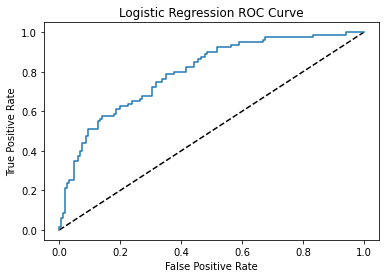

In [19]:
fpr, tpr, tresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

In [20]:
#AUC - area under curve -> inna miara jakości modelu

In [21]:
from sklearn.metrics import roc_auc_score

In [22]:
roc_auc_score(y_test, y_pred_prob)

0.7963576158940396

In [23]:
#Auc using cross validation

In [24]:
cv_auc_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

In [25]:
cv_auc_scores

array([0.81240741, 0.80777778, 0.82555556, 0.87283019, 0.84471698])

In [26]:
pima_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
#Dropping missing data

In [28]:
pima_dataset.Insulin.replace(0, np.nan, inplace = True)
pima_dataset.SkinThickness.replace(0, np.nan, inplace = True)
pima_dataset.BMI.replace(0, np.nan, inplace=True)

In [29]:
pima_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [30]:
#Imputting missing data

In [31]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X)
X = imp.transform(X)

In [32]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [33]:
#Imputing with pipeline

In [34]:
pima_dataset = pd.read_csv('/Users/szymonturek/Documents/jupyter_notebook/PIMA Indians Diabetes (Beginner)/diabetes.csv')


In [35]:
pima_dataset.isnull().values.any()


False

In [36]:
pima_dataset.isnull().sum().sum()


0

In [37]:
#Imputing within a pipeline

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
logreg = LogisticRegression(max_iter=1200000)
steps = [('imputation', imp), ('logistic_regression', logreg)]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42 )
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [39]:
pipeline.score(X_test, y_test)

0.7359307359307359

In [40]:
pima_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [41]:
#Ways to normalize data:
#given any column , you can subtract the mean and divide by the variance so that all features are centered around 
#zero and have variance one. This is called standardization. 
#You can also subtract the minimum and divide by the range of the data so the normalized dataset has minimum
#zero and maximum one. 
#You can also normalize so that data ranges from -1 to 1 instead. 

In [42]:
#Scaling in scikit-learn

In [43]:
from sklearn.preprocessing import scale
X_scaled = scale(X)

In [44]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [45]:
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [46]:
np.mean(X) 

44.98579117838542

In [47]:
np.std(X)

58.37297131925462

In [48]:
np.mean(X_scaled)

8.86154575644819e-17

In [49]:
np.std(X_scaled)

1.0

In [50]:
#Scaling in a pipeline

In [51]:
from sklearn.preprocessing import StandardScaler
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
logreg = LogisticRegression(max_iter=1200000)
steps = [('imputation', imp), ('scaler', StandardScaler()), ('logistic_regression', logreg)]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21 )
logreg_scaled = pipeline.fit(X_train, y_train)
y_pred = logreg_scaled.predict(X_test)

In [52]:
logreg_scaled.score(X_test, y_test)

0.7359307359307359

In [53]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7359307359307359

In [54]:
logreg_unscaled = LogisticRegression(max_iter=1200000).fit(X_train, y_train)
logreg_unscaled.score(X_test, y_test)

0.7359307359307359

In [55]:
#logreg_scaled.predict_proba(X_test)[:,1]

In [56]:
#Linear SVC

In [57]:
#The basic SVM classifier is called LinearSVC for linear support vector classifier

In [58]:
#The LinearSVC object works exactly the same way as LogisticRegression. 

In [59]:
from sklearn.svm import LinearSVC

In [60]:
svm = LinearSVC(max_iter=120000000)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
svm.score(X_test, y_test)


0.7316017316017316

In [61]:
accuracy_score(y_test, y_pred)

0.7316017316017316

In [62]:
#SVC #fits a nonlinear SVM by default

In [63]:
from sklearn.svm import SVC
svm = SVC(max_iter=120000000)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
svm.score(X_test, y_test)



0.7012987012987013

In [64]:
accuracy_score(y_test, y_pred)

0.7012987012987013

In [65]:
#Regularization

In [66]:
lr_weak_reg = LogisticRegression(C=100, max_iter=1200000)
lr_strong_reg = LogisticRegression(C=0.01, max_iter=1200000)

In [67]:
lr_weak_reg.fit(X_train, y_train)
lr_strong_reg.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=1200000)

In [68]:
lr_weak_reg.score(X_train, y_train)


0.7988826815642458

In [69]:
lr_strong_reg.score(X_train, y_train)

0.7932960893854749

In [70]:
lr_weak_reg.score(X_test, y_test)

0.7359307359307359

In [71]:
lr_strong_reg.score(X_test, y_test)

0.7359307359307359

In [72]:
#L1 vs L2 regularization

In [73]:
#Lasso = linear regression with L1 regularization
#Ridge = linear regression with L2 regularization
#For other models like logistic regression we just say L1, L2, etc. 

In [74]:
lr_L1 = LogisticRegression(penalty = 'l1', solver='liblinear')
lr_L2 = LogisticRegression(max_iter=1200000) # penalty = 'l2' by default

lr_L1.fit(X_train,  y_train)
lr_L2.fit(X_train, y_train)

LogisticRegression(max_iter=1200000)

In [75]:
lr_L1.score(X_test, y_test)

0.7316017316017316

In [76]:
lr_L2.score(X_test, y_test)

0.7359307359307359

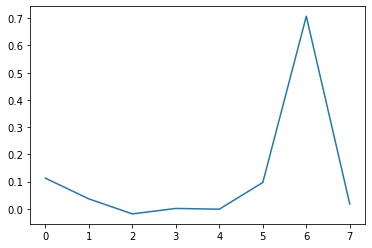

In [77]:
plt.plot(lr_L1.coef_.flatten())

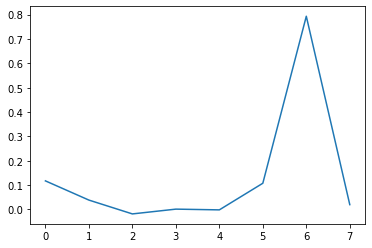

In [78]:
plt.plot(lr_L2.coef_.flatten())

In [79]:
#L2 vs L1 regularization
#L1 regularization set many of the coefficients to zero, thus ignoring those features; in other words, 
#it performed feature; in other words, it performed feature selection for us. On the other hand, L2 regularization 
#just shrinks the coefficients to be smaller. This is analogous to what happens with Lasso and Ridge regression

In [80]:
lr_class_1 = LogisticRegression(C=100,max_iter=1200000 )
lr_class_1.fit(X_train, y_train==1)

plot_classifier(X_train, y_train==1, lr_class_1)

NameError: name 'plot_classifier' is not defined

In [ ]:
#Stochastic gradient descent
#It;s worth knowing about SGDClassifier, since it can handle very large datasets much better 
#than other methods we've discussed

In [ ]:
from sklearn.linear_model import SGDClassifier
logreg = SGDClassifier(loss = 'log')
linsvm = SGDClassifier(loss = 'hinge')

In [ ]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg.score(X_test, y_test)

In [ ]:
linsvm.fit(X_train, y_train)
y_pred = linsvm.predict(X_test)
linsvm.score(X_test, y_test)

In [ ]:
#Machine learning with tree-based models

In [ ]:
#Classification tree - a classification tree learns a sequence of if-else questions
#about individual features in order to infer the labels. In contrast to linear models, 
#trees are able to capture non-linear relationships between features and labels. 
#In addition, trees don't require the features to be on the same scale through standatization

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 1, stratify=y )


In [ ]:
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

In [ ]:
dt.fit(X_train, y_train)

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.preprocessing import StandardScaler
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
dt = DecisionTreeClassifier(max_depth=2, random_state=1)
steps = [('imputation', imp), ('scaler', StandardScaler()), ('decision_tree', dt)]
pipeline = Pipeline(steps)
dt_scaled = pipeline.fit(X_train, y_train)
y_pred = dt_scaled.predict(X_test)

In [ ]:
dt_scaled.score(X_test, y_test)

In [ ]:
dt = DecisionTreeClassifier(max_depth=5, random_state=1, criterion='gini')
steps = [('imputation', imp), ('scaler', StandardScaler()), ('decision_tree', dt)]
pipeline = Pipeline(steps)
dt_scaled = pipeline.fit(X_train, y_train)
y_pred = dt_scaled.predict(X_test)

In [ ]:
dt_scaled.score(X_test, y_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)
steps = [('imputation', imp), ('scaler', StandardScaler()), ('decision_tree', dt)]
pipeline = Pipeline(steps)
dt_scaled = pipeline.fit(X_train, y_train)
y_pred = dt_scaled.predict(X_test)
dt_scaled.score(X_test, y_test)

In [ ]:
#Ensemble learning can be summarized as follows: -As a first step, different models 
#are trained on the same dataset.
#-Each model makes its own predictions
#-A meta-model then aggregates the predictions of individual models and outputs a final
#prediction
#-The final prediction is more robust and less prone to errors than each individual model
#-The best results are obtained when the models are skillful but in different ways meaning
#that if some models make predictions that are way off, the other models should compensate 
#these errors. In such case, the meta-model's predictions are more robust. 

In [ ]:
#Voting classifier in sklearn 
from sklearn.ensemble import VotingClassifier

In [ ]:
#set seed for reproducibility
SEED =1

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = SEED)
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression(random_state = SEED)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(max_depth=5, random_state=1, criterion='gini')


NameError: name 'SEED' is not defined

In [ ]:
classifiers = [('Logistic Regression', lr),
              ('K Nearest Neighbours', knn),
              ('Classification Tree', dt)]

In [ ]:
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('{} : {}'.format(clf_name, accuracy_score(y_test, y_pred)))

In [ ]:
vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
print('Voting classifier: {}'.format(accuracy_score(y_test, y_pred)))

In [ ]:
#Bagging(Bootstrap aggregation)
#Voting classifier = same training set and different algorithm
#Bagging = one algorithm and subsets of the training set
#Bagging reduces variance of individual models in the ensemble

In [81]:
dt = DecisionTreeClassifier(max_depth=5, random_state=1, criterion='gini')
bc = BaggingClassifier(base_estimator=dt, n_estimator=300, n_jobs=-1)

NameError: name 'DecisionTreeClassifier' is not defined